In [125]:
import pandas as pd

df = pd.read_csv('output.csv')
df = df.drop(columns=['Игрок', 'Гол+Пас за один матч', '#'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Амплуа                  500 non-null    object
 1   Возраст                 500 non-null    int64 
 2   Нац.                    500 non-null    object
 3   Клуб(ы)                 500 non-null    object
 4   Стоимость               500 non-null    object
 5   Матчи                   500 non-null    int64 
 6   Голы                    500 non-null    int64 
 7   автоголы                500 non-null    int64 
 8   Передачи                500 non-null    int64 
 9   Желтые карточки         500 non-null    int64 
 10  Вторая желтая карточка  500 non-null    int64 
 11  Красные карточки        500 non-null    int64 
 12  Вышел на замену         500 non-null    int64 
 13  Заменен                 500 non-null    int64 
dtypes: int64(10), object(4)
memory usage: 54.8+ KB


In [126]:
import numpy as np


def parse_money(s):
    if s is np.nan:
        return None

    number = float(s.split()[0].replace(',', '.'))
    return number

df['Стоимость'] = df['Стоимость'].apply(parse_money)
df.head(10)

,Амплуа,Возраст,Нац.,Клуб(ы),Стоимость,Матчи,Голы,автоголы,Передачи,Желтые карточки,Вторая желтая карточка,Красные карточки,Вышел на замену,Заменен
0,Центральный нап.,23,Норвегия,Манчестер Сити,180.0,8,7,0,2,0,0,0,0,3
1,Правый Вингер,22,Бразилия,Реал Мадрид,100.0,5,1,0,0,0,0,0,0,3
2,Центр. полузащитник,25,Уругвай,Реал Мадрид,100.0,5,1,0,0,0,0,0,1,2
3,Центр. полузащитник,19,Испания,Барселона,90.0,6,2,0,0,3,0,0,1,2
4,Опорный полузащитник,24,Англия,Арсенал,90.0,7,1,0,0,0,0,0,0,2
5,Опорный полузащитник,27,Испания,Манчестер Сити,90.0,8,3,0,2,3,0,0,0,2
6,Левый Вингер,24,Португалия,Милан,90.0,5,2,0,2,0,0,0,0,2
7,Атак. полузащитник,24,Норвегия,Арсенал,90.0,7,2,0,0,0,0,0,0,4
8,Центральный нап.,30,Англия,Бавария Мюнхен,90.0,6,5,0,1,0,0,0,1,4
9,Центр. полузащитник,20,Франция,Реал Мадрид,85.0,6,0,0,1,0,0,0,2,3


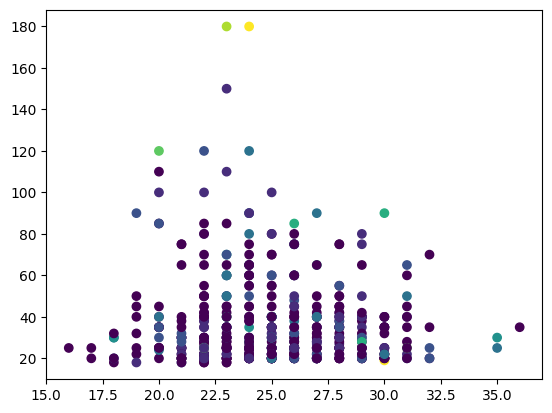

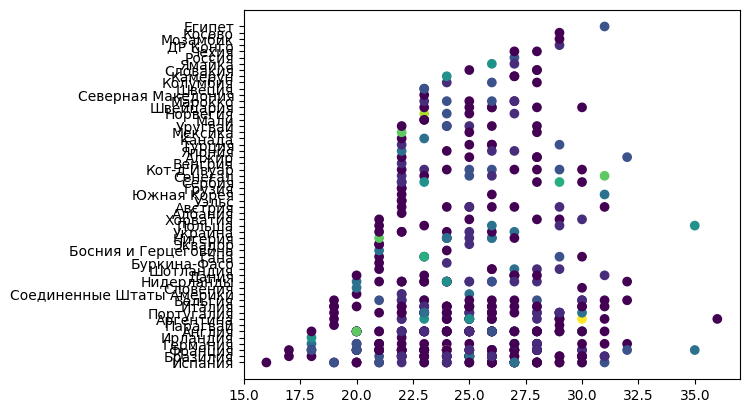

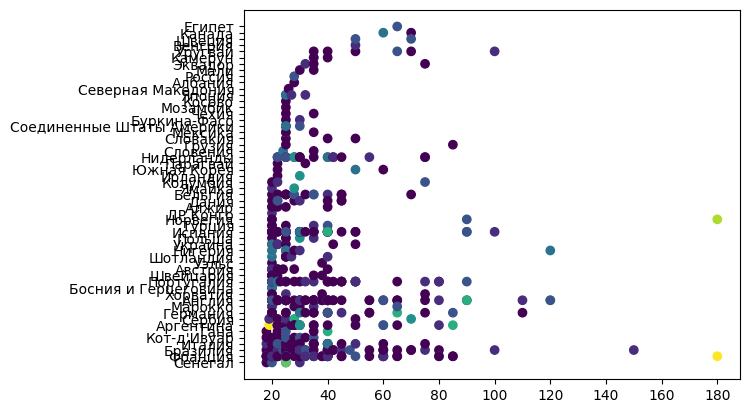

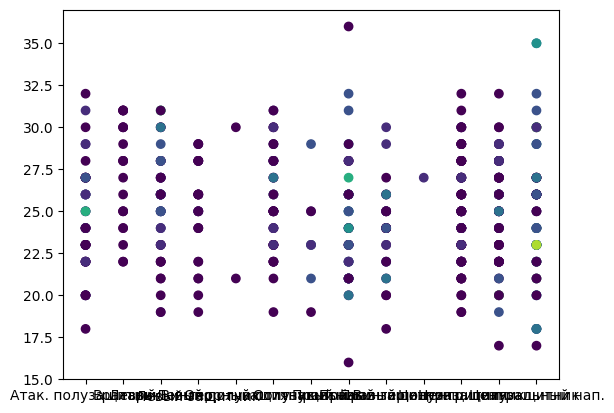

<bound method DataFrame.info of                    Амплуа  Возраст         Нац.              Клуб(ы)  \
0        Центральный нап.       23     Норвегия       Манчестер Сити   
1           Правый Вингер       22     Бразилия          Реал Мадрид   
2     Центр. полузащитник       25      Уругвай          Реал Мадрид   
3     Центр. полузащитник       19      Испания            Барселона   
4    Опорный полузащитник       24       Англия              Арсенал   
..                    ...      ...          ...                  ...   
495  Опорный полузащитник       23         Гана                 Ланс   
496        Левый защитник       21      Франция            Стад Ренн   
497       Центр. защитник       22  Кот-д'Ивуар  Байер 04 Леверкузен   
498          Левый Вингер       19       Италия         Лидс Юнайтед   
499        Оттянутый нап.       23      Сенегал      Олимпик Марсель   

     Стоимость  Матчи  Голы  автоголы  Передачи  Желтые карточки  \
0        180.0      8     7        

In [127]:
from matplotlib import pyplot as plt


def show_column(column):
    df_sorted = df.sort_values(by = [column])
    plt.plot(df_sorted[column], df_sorted['Голы'])
    plt.show()

def show_column_scatter(column1, column2):
    df_sorted = df.sort_values(by = [column1])
    df_sorted['Голы'] = tuple(map(lambda x: int(x), df_sorted['Голы']))
    plt.scatter(df_sorted[column1], df_sorted[column2], c=df_sorted['Голы'])
    plt.show()


show_column_scatter('Возраст', 'Стоимость')
show_column_scatter('Возраст', 'Нац.')
show_column_scatter('Стоимость', 'Нац.')
show_column_scatter('Амплуа', 'Возраст')
df['del'] = df['Стоимость']/df['Возраст']
df.info

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cont_col = ['Возраст', 'Стоимость', 'Матчи', 'Желтые карточки', 'Вторая желтая карточка','Красные карточки', 'автоголы', 'Передачи','Красные карточки', "Вышел на замену", "Заменен"]
df[cont_col] = scaler.fit_transform(df[cont_col])

In [129]:
from sklearn.preprocessing import OneHotEncoder

columns = ['Клуб(ы)', 'Амплуа', 'Нац.']
onehotencoder = OneHotEncoder(sparse_output=False)
data_new = onehotencoder.fit_transform(df[columns])
categories = onehotencoder.categories_
df = df.drop(columns=columns)
df = pd.concat([df, pd.DataFrame(data_new,
columns=np.concatenate([*categories]))], axis=1)

In [130]:
df.head(100)
df.describe()

,Возраст,Стоимость,Матчи,Голы,автоголы,Передачи,Желтые карточки,Вторая желтая карточка,Красные карточки,Вышел на замену,...,Франция,Хорватия,Чехия,Швейцария,Швеция,Шотландия,Эквадор,Южная Корея,Ямайка,Япония
count,5.000000e+02,500.000000,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-2.806644e-16,0.000000,1.652012e-16,0.810000,-1.243450e-17,4.973799e-17,-3.907985e-17,-7.105427e-18,-2.842171e-17,4.263256e-17,...,0.118000,0.010000,0.004000,0.012000,0.004000,0.012000,0.006000,0.006000,0.004000,0.008000
std,1.001002e+00,1.001002,1.001002e+00,1.325675,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,...,0.322931,0.099598,0.063182,0.108994,0.063182,0.108994,0.077304,0.077304,0.063182,0.089173
min,-2.825604e+00,-0.870036,-2.150751e+00,0.000000,-1.102078e-01,-5.879224e-01,-7.413120e-01,-1.102078e-01,-1.102078e-01,-6.981897e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.337569e-01,-0.685589,-2.837797e-01,0.000000,-1.102078e-01,-5.879224e-01,-7.413120e-01,-1.102078e-01,-1.102078e-01,-6.981897e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-7.514904e-03,-0.316695,1.829632e-01,0.000000,-1.102078e-01,-5.879224e-01,-7.413120e-01,-1.102078e-01,-1.102078e-01,-6.981897e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.187271e-01,0.144422,6.497062e-01,1.000000,-1.102078e-01,4.471523e-01,4.026880e-01,-1.102078e-01,-1.102078e-01,1.450346e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.436816e+00,6.600063,3.450164e+00,8.000000,9.073772e+00,5.622526e+00,3.834688e+00,9.073772e+00,9.073772e+00,5.204380e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Голы'])
Y = df['Голы']

x, x_test, y, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2,train_size=0.8)

In [132]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

coefs = [1, 2, 5, 10, 20, 30, 50, 100, 200]
error_train = []
error_val = []
for coef in coefs:
    knn = KNeighborsRegressor(n_neighbors=coef)
    knn.fit(x_train, y_train)
    error_train.append(mean_squared_error(knn.predict(x_train), y_train))
    error_val.append(mean_squared_error(knn.predict(x_val), y_val))

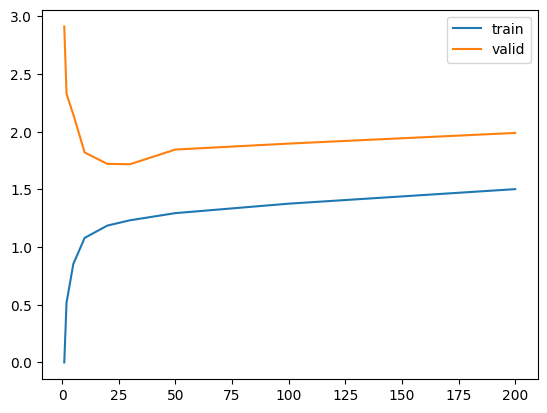

In [133]:
plt.plot(coefs, error_train, label='train')
plt.plot(coefs, error_val, label='valid')
plt.legend()
plt.show()

In [134]:
class KNN:
    def __init__(self, K: int = 3, p: int = 2) -> None:
        self.K = K
        self.p = p
        self.X_train = np.array([])
        self.y_train = np.array([])

    def minkowski(self, x: np.array) -> np.array:
        return np.power(np.sum(np.power(np.abs(self.X_train - x), self.p), axis=1), 1 / self.p)

    def distances(self, X: np.array) -> np.array:
        return np.apply_along_axis(self.minkowski, 1, X)

    def fit(self, X: np.array, y: np.array) -> None:
        self.X_train = np.copy(X)
        self.y_train = np.copy(y)

    def generate_predictions(self, idx_neighbours: np.array) -> np.array:
        y_pred = np.mean(self.y_train[idx_neighbours], axis=1)
        return y_pred

    def predict(self, X: np.array) -> np.array:
        D = self.distances(X)
        idx_neighbours = D.argsort()[:, :self.K]
        y_pred = self.generate_predictions(idx_neighbours)
        return y_pred



In [135]:
error_train1 = []
error_val1 = []
for coef in coefs:
    knn1 = KNN(coef)
    knn1.fit(x_train, y_train)
    error_train1.append(mean_squared_error(knn1.predict(x_train), y_train))
    error_val1.append(mean_squared_error(knn1.predict(x_val), y_val))


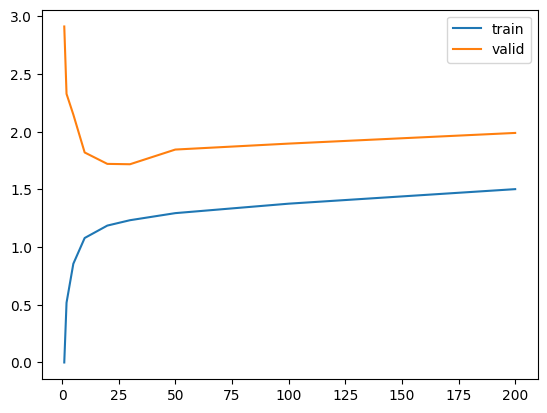

In [136]:
plt.plot(coefs, error_train1, label='train')
plt.plot(coefs, error_val1, label='valid')
plt.legend()
plt.show()